In [1]:
%load_ext autoreload
%load_ext autotime

time: 179 µs (started: 2023-12-17 23:35:48 -08:00)


In [2]:
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings('ignore')
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=(SettingWithCopyWarning))

time: 602 ms (started: 2023-12-17 23:35:48 -08:00)


In [3]:
import dask
import dask.dataframe as dd
import numpy as np
import pandas as pd
print('pandas', pd.__version__)
print('dask', dask.__version__)
print('numpy', np.__version__)

pandas 2.1.2
dask 2023.9.3
numpy 1.24.3
time: 720 ms (started: 2023-12-17 23:35:48 -08:00)


In [4]:
trace_path = '/usr/workspace/iopp/wisio_logs/recorder_flash_sedov3d_hdf5/_parquet'

time: 439 µs (started: 2023-12-17 23:35:49 -08:00)


In [5]:
%autoreload 2

from wisio.cluster_management import load_cluster_config
from wisio.recorder import RecorderAnalyzer

cluster_config = load_cluster_config('cluster_config_local.yml')
cluster_config.local_dir = '/var/tmp/wisio_recorder_flash_sedov3d_hdf5'

analyzer = RecorderAnalyzer(
    checkpoint=True,
    checkpoint_dir='/usr/workspace/iopp/wisio_logs/_checkpoints/recorder_flash_sedov3d_hdf5',
    cluster_config=cluster_config,
    working_dir='.wisio/recorder_flash_sedov3d_hdf5',
    debug=False,
)

analyzer.cluster_manager.client.dashboard_link

[INFO] [23:35:58] Initializing Recorder analyzer [/g/g91/izzet/projects/wisio/wisio/analyzer.py:96]


'http://127.0.0.1:39915/status'

time: 2.83 s (started: 2023-12-17 23:35:57 -08:00)


In [6]:
%autoreload 2

result = analyzer.analyze_parquet(
    trace_path=trace_path, 
    metrics=['time'],
    # view_types=['proc_name'],
)

[INFO] [23:36:03] Read traces (0.16613700985908508) [/g/g91/izzet/projects/wisio/wisio/recorder.py:67]
[INFO] [23:36:03] Compute high-level metrics (0.030325655825436115) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:124]
[INFO] [23:36:03] Compute main view (0.06122266594320536) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:136]
[INFO] [23:36:04] Compute metric boundaries (0.755280377343297) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:145]
[INFO] [23:36:09] Compute perspectives (4.798528099432588) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:168]
/g/g91/izzet/projects/wisio/wisio/analysis.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['bw_intensity'] = ddf['bw'] * ddf['intensity']
/g/g91/izzet/projects/wisio/wisio/analysis.py:69:

time: 26.1 s (started: 2023-12-17 23:36:03 -08:00)


In [7]:
result.output.console(show_debug=True)

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             53.98 seconds                                                                             │
│  I/O Time             1.99 seconds                                                                              │
│                       ├── Read - 0.00 seconds (0.00%)                                                           │
│                       ├── Write - 0.31 seconds (15.65%)                                                         │
│                       └── Metadata - 1.71 seconds (86.02%)                                                      │
│  I/O Ops              2,478,922 ops                                                                             │
│                       ├── Read - 4 ops (0.00%)                                                                  │
│                       ├── Write - 1,769 ops (0.07%)                                                             │
│                       └── Metadata - 2,477,149 ops (99.93%)                                                     │
│  I/O Size             4.34 GB                                                                                   │
│                       ├── Read - 0.00 GB (0.00%)                                                                │
│                       └── Write - 0.27 GB (6.24%)                                                               │
│  Read Xfer            4 KB-16 KB - 2 ops                                                                        │
│                       ├── <4 KB - 1 ops (50.00%)                                                                │
│                       └── 4-16 KB - 1 ops (50.00%)                                                              │
│  Write Xfer           4 KB-1 MB - 427 ops                                                                       │
│                       ├── <4 KB - 381 ops (89.23%)                                                              │
│                       ├── 4-16 KB - 7 ops (1.64%)                                                               │
│                       ├── 16-64 KB - 10 ops (2.34%)                                                             │
│                       └── 256 KB-1 MB - 29 ops (6.79%)                                                          │
│  Node(s)              1 node(s)                                                                                 │
│                       └── localhost - 1.99 s (100.00%) - 0.00/0.27 GB R/W (0.00/6.24%) - 2,478,922 ops          │
│                           (100.00%)                                                                             │
│  App(s)               1 app(s)                                                                                  │
│                       └── app1 - 1.99 s (100.00%) - 0.00/0.27 GB R/W (0.00/6.24%) - 2,478,922 ops (100.00%)     │
│  Process(es)/Rank(s)  1024 process(es)/rank(s)                                                                  │
│  Files                1581 files                                                                                │
│                       ├── Shared: 274 files (17.33%)                                                            │
│                       └── FPP: 1307 files (82.67%)                                                              │
│  Access Pattern       100.00% Sequential - 0.00% Random                                                         │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
╭──────────────────────────────────────────────── I/O Bottlenecks ────────────────────────────────────────────────╮
│  size_imbalance (6 bottlenecks)                                                                                 │
│  ├── proc_name > rank (1 bottlenecks)                 

time: 927 ms (started: 2023-12-17 23:36:30 -08:00)


(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x155520a400a0>)

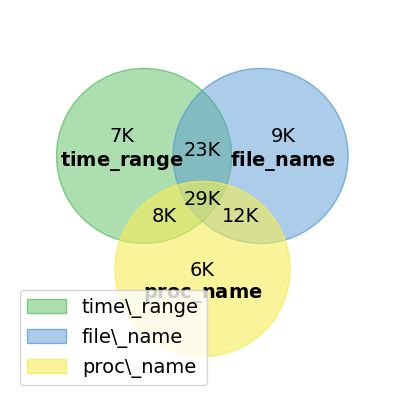

time: 883 ms (started: 2023-12-17 23:36:48 -08:00)


In [8]:
result.plots.view_relations3(
    metric='time',
    view_key1=('time_range',),
    view_key2=('file_name',),
    view_key3=('proc_name',),
)

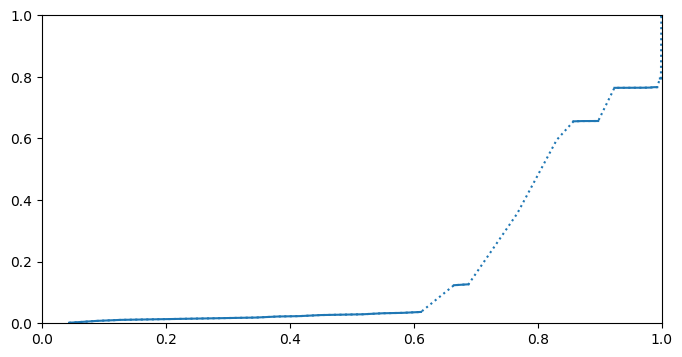

time: 462 ms (started: 2023-12-17 23:36:57 -08:00)


In [9]:
fig, ax = result.plots.slope(
    figsize=(8, 4),
    metric='time',
    view_keys=[('time_range',)],
)